Experiment A: Clustering in the Genetic Space

In [188]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import SpectralClustering
import warnings
warnings.filterwarnings("ignore")

In [189]:
def identify_spec(label):
    q_index = label.find('Q')
    if q_index == -1 or q_index == len(label) - 1:
        return '/'
    return label[q_index: q_index + 2]

In [190]:
df = pd.read_csv('data/gene.csv')
meta_df = pd.read_csv('data/metadata.csv')

In [191]:
meta_df = meta_df[['DNA_ID','TreeNo']]
meta_df['spec'] = meta_df['TreeNo'].apply(identify_spec)

In [192]:
df_hold = df.merge(meta_df.drop('TreeNo', axis=1), on='DNA_ID')
df_hold.head()

,DNA_ID,PC1,PC2,PC3,PC4,PC5,PC6,spec
0,27-A,21.708180,-1.917705,-1.904397,8.736799,0.215774,0.896592,QR
1,58-A,-5.810405,-0.052144,-9.538036,-2.079761,-3.775415,4.764205,QA
2,85-A,-8.408125,-2.288342,4.408345,1.755349,-0.421010,-0.327213,QS
3,109-A,11.720923,-1.770264,5.153834,-12.588452,-0.264384,1.568802,QR
4,131-A,-7.876694,0.132502,-12.803103,-0.833360,-7.874460,-23.156548,QA


In [193]:
data = df_hold.drop(['DNA_ID', 'spec'], axis=1)

# data = data**2

# Log-transform the data
# transformer = FunctionTransformer(np.log, validate=True)
# data = transformer.transform(data)
# print(data)

# # Standardize the data (important for PCA)
# scaler = StandardScaler()
# data = scaler.fit_transform(data)

# Perform spectral clustering
spectral = SpectralClustering(n_clusters=2, random_state=0)
cluster_labels = spectral.fit_predict(data)

# perform k-means clustering
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3, random_state=0)
# cluster_labels = kmeans.fit_predict(data)

# Perform PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

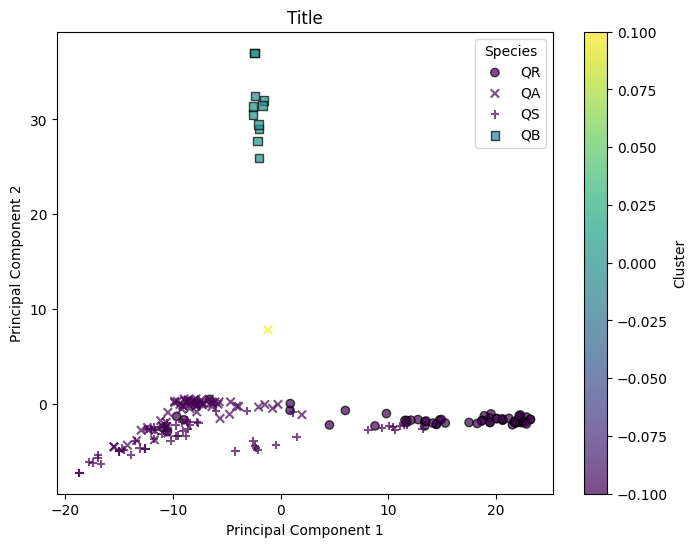

In [194]:
# Create a DataFrame for plotting
species_labels = df_hold['spec']

# Map species to markers
unique_species = species_labels.unique()
markers = ['o', 'x', '+', 's', 'd', '*', 'p', '^', '<', '>']  # Add more if you have more than 10 species
species_to_marker = {species: markers[i % len(markers)] for i, species in enumerate(unique_species)}

# Plot the PCA-transformed data with species-specific markers and GMM cluster colors
plt.figure(figsize=(8, 6))
for species, marker in species_to_marker.items():
    species_data = data_pca[species_labels == species]
    species_cluster_labels = cluster_labels[species_labels == species]
    plt.scatter(species_data[:, 0], species_data[:, 1], c=species_cluster_labels, marker=marker, label=species, edgecolor='k', alpha=0.7, cmap='viridis')

plt.title('Title')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')2
plt.legend(title='Species')
plt.colorbar(label='Cluster')
plt.show()

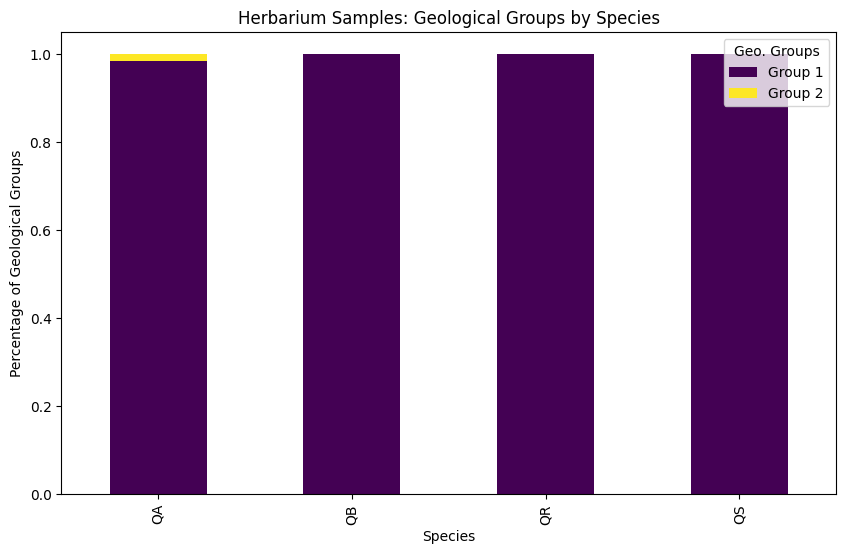

In [195]:
# Create a DataFrame for plotting
species_labels = df_hold['spec']
plot_data = pd.DataFrame({'species': species_labels, 'cluster': cluster_labels})
cluster_counts = plot_data.groupby(['species', 'cluster']).size().unstack(fill_value=0)

# Normalize the counts to get proportions
cluster_proportions = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

# Plotting
cluster_proportions.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Herbarium Samples: Geological Groups by Species')
plt.xlabel('Species')
plt.ylabel('Percentage of Geological Groups')
plt.legend(title='Geo. Groups', labels=[f'Group {x}' for x in range(1, 5)])
plt.show()